In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
environments = ["pointmaze", "kheperax", "hopper_uni", "walker2d_uni"]

In [3]:
dfs = []
for seed in range(3):
    for sampling in ["both", "s1", "s2", "mapelites"]:
        for env in environments:
            sampling_string = sampling if sampling.startswith("map") else "bimapelites_" + sampling
            path = f"D:/Research/QDAX/{sampling_string}_cgp_{env}_{seed}.csv"
            df = pd.read_csv(path)
            df["seed"] = seed
            df["sampling"] = sampling
            df["environment"] = env
            if env != "pointmaze" and sampling == "mapelites":
                df["coverage1"] = df["coverage1"] * 100
                df["coverage2"] = df["coverage2"] * 100
            dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.head()

,loop,iteration,qd_score1,max_fitness,coverage1,time,current_time,qd_score2,coverage2,seed,sampling,environment,qd_score,coverage
0,1,1,1890.3533,-66.425415,1.855469,15.325334,2023-12-01 17:12:04.518292,12657.999,11.523438,0,both,pointmaze,NaN,NaN
1,2,11,3577.9604,-66.425415,3.125000,0.463299,2023-12-01 17:12:28.100962,16309.016,13.476562,0,both,pointmaze,NaN,NaN
2,3,21,4537.2060,-66.425415,3.906250,0.525416,2023-12-01 17:12:29.485937,19306.123,15.625000,0,both,pointmaze,NaN,NaN
3,4,31,5494.4297,-66.425415,4.589844,0.379405,2023-12-01 17:12:30.666497,21521.860,17.089844,0,both,pointmaze,NaN,NaN
4,5,41,6761.0293,-66.425415,5.468750,0.591467,2023-12-01 17:12:32.306812,24194.314,18.554688,0,both,pointmaze,NaN,NaN


In [8]:
final_df = df[df["iteration"] == max(df["iteration"])]
final_df.head()

,loop,iteration,qd_score1,max_fitness,coverage1,time,current_time,qd_score2,coverage2,seed,sampling,environment,qd_score,coverage
999,1000,9991,1.565405e+05,-29.958103,99.609375,0.375825,2023-12-01 17:32:37.894600,9.590693e+04,54.296875,0,both,pointmaze,NaN,NaN
1999,1000,9991,1.568119e+03,0.748614,93.457030,2.258241,2023-11-16 18:49:58.939951,1.092950e+03,51.171875,0,both,kheperax,NaN,NaN
2999,1000,9991,1.914726e+06,1382.421100,94.335940,18.245656,2023-11-20 20:41:52.410489,8.013921e+05,44.335938,0,both,hopper_uni,NaN,NaN
3999,1000,9991,2.334284e+06,1737.879200,90.527340,18.095905,2023-11-28 20:47:25.644018,1.218695e+06,48.925780,0,both,walker2d_uni,NaN,NaN
4999,1000,9991,1.582670e+05,-30.493835,99.023440,0.336312,2023-12-01 17:32:32.759807,3.463970e+04,20.898438,0,s1,pointmaze,NaN,NaN


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


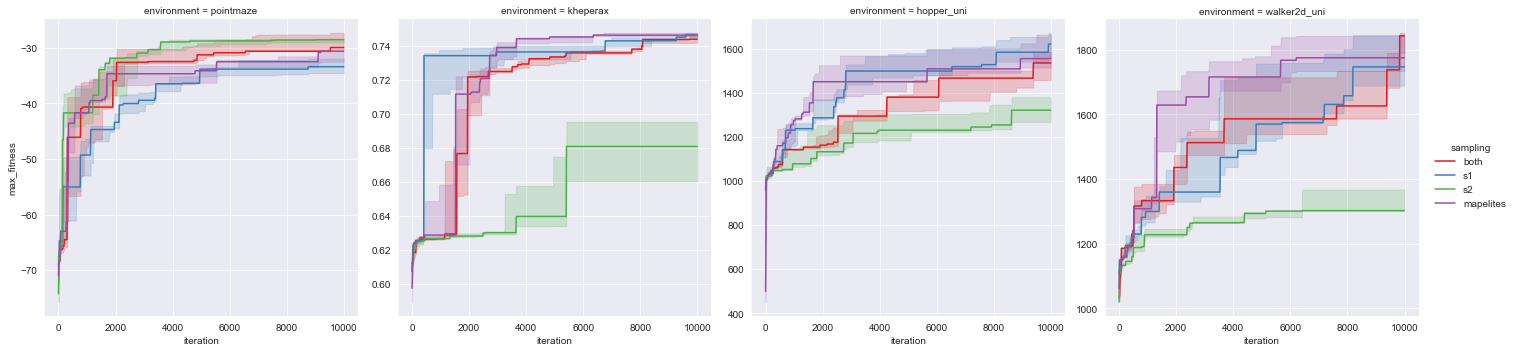

In [22]:
g = sns.relplot(
    data=df,
    x="iteration",
    y="max_fitness",
    hue="sampling",
    col="environment",
    kind="line",
    estimator="median",
    errorbar=("pi", 50),
    facet_kws=dict(sharey=False),
    palette="Set1"
)
plt.show()

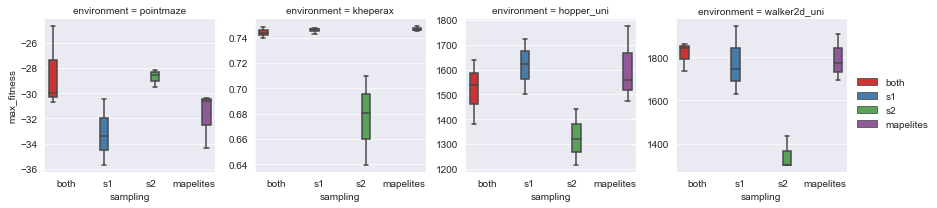

In [21]:
g = sns.FacetGrid(final_df, col="environment", sharey=False)
g.map_dataframe(sns.boxplot, y="max_fitness", x="sampling", hue="sampling", palette="Set1")
g.add_legend()
plt.show()

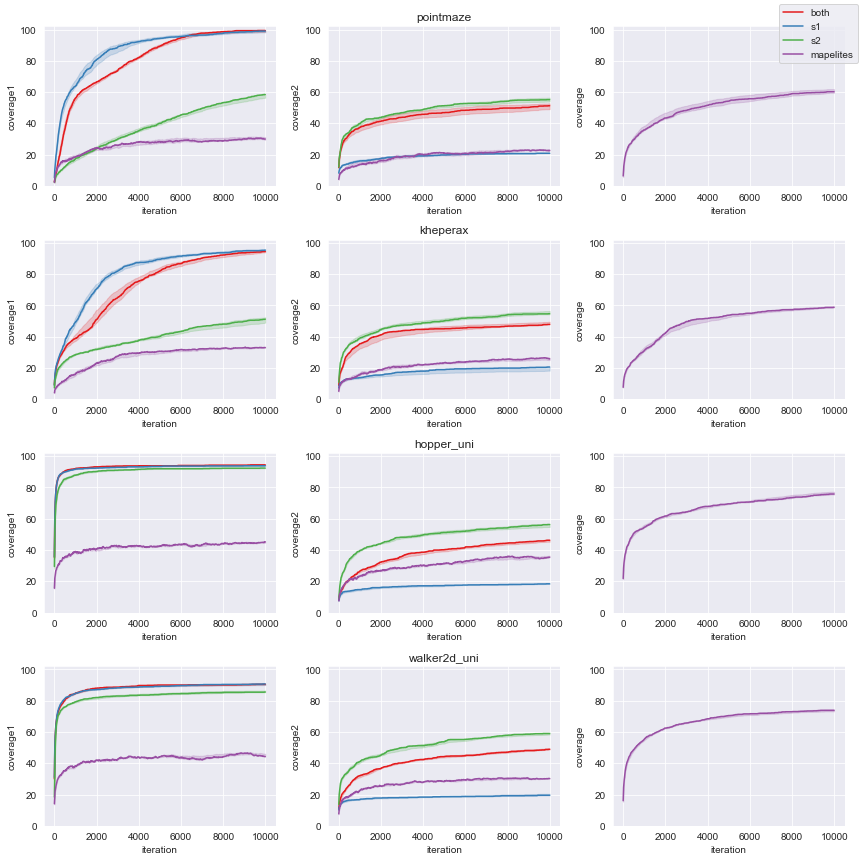

In [23]:
fig, axs = plt.subplots(len(environments), 3, figsize=(12, 12))
for i, env in enumerate(environments):
    tmp_df = df[df["environment"] == env]
    sns.lineplot(
        data=tmp_df,
        x="iteration",
        y="coverage1",
        hue="sampling",
        estimator="median",
        errorbar=("pi", 50),
        ax=axs[i][0],
        palette="Set1"
    )
    sns.lineplot(
        data=tmp_df,
        x="iteration",
        y="coverage2",
        hue="sampling",
        estimator="median",
        errorbar=("pi", 50),
        ax=axs[i][1],
        palette="Set1"
    )
    sns.lineplot(
        data=tmp_df,
        x="iteration",
        y="coverage",
        hue="sampling",
        estimator="median",
        errorbar=("pi", 50),
        ax=axs[i][2],
        palette="Set1"
    )
    axs[i][1].set_title(env)
    for ax in axs[i]:
        ax.set_ylim([0, 102])
        ax.get_legend().set_visible(False)
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
plt.show()

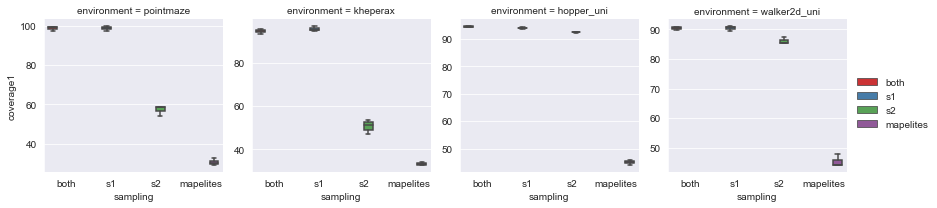

In [19]:
g = sns.FacetGrid(final_df, col="environment", sharey=False)
g.map_dataframe(sns.boxplot, y="coverage1", x="sampling", hue="sampling", palette="Set1")
g.add_legend()
plt.show()

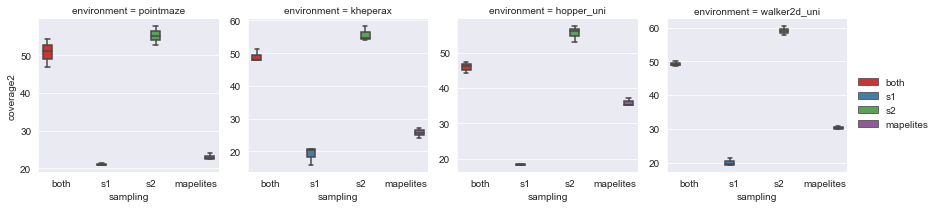

In [20]:
g = sns.FacetGrid(final_df, col="environment", sharey=False)
g.map_dataframe(sns.boxplot, y="coverage2", x="sampling", hue="sampling", palette="Set1")
g.add_legend()
plt.show()

In [24]:
validation_df = pd.read_csv("D:/Research/QDAX/validation_metrics.csv")
validation_df.head()

,average_difference,max_difference,min_difference,average_relative_difference,min_relative_difference,max_relative_difference,max_validation_fitness,difference_of_maxs,relative_difference_of_maxs,relative_difference_baseline,seed,environment,sampling,repertoire_id,sensor_id
0,inf,3.402823e+38,16.148796,2.456946e+35,-6.894172e-01,6.084006e+37,-36.447388,106.489290,1.520366,1.520827e+00,0,pointmaze,bimapelites_both,0,0
1,inf,3.402823e+38,-10.132797,inf,-1.452718e+37,2.947352e+37,23.986618,46.055283,0.657539,4.858268e+36,0,pointmaze,bimapelites_both,0,1
2,inf,3.402823e+38,-68.759735,7.561126e+34,-6.439285e+00,1.009146e+37,-36.319397,106.361300,1.518538,1.519027e+00,0,pointmaze,bimapelites_both,1,0
3,inf,3.402823e+38,-84.947130,inf,-1.888057e+01,2.407210e+37,29.020615,41.021286,0.585668,4.858268e+36,0,pointmaze,bimapelites_both,1,1
4,inf,3.402823e+38,31.791214,1.783826e+35,-4.532345e+00,2.107224e+37,-36.484420,105.990585,1.524909,1.524909e+00,0,pointmaze,bimapelites_s1,0,0


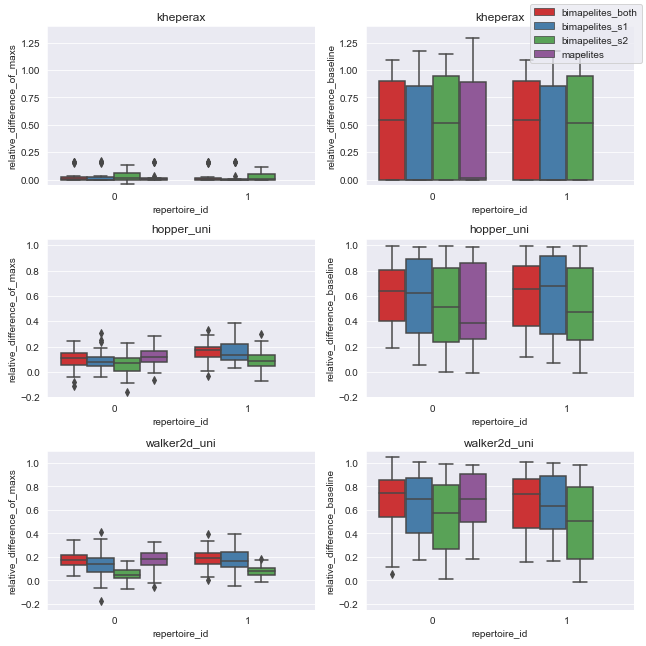

In [27]:
limits = {
    "kheperax": [-0.05, 1.4],
    "hopper_uni": [-0.2, 1.05],
    "walker2d_uni": [-0.25, 1.1],
}
fig, axs = plt.subplots(len(limits.keys()), 2, figsize=(9, 9))
for i, env in enumerate(limits.keys()):
    tmp_df = validation_df[validation_df["environment"] == env]
    g = sns.boxplot(
        data=tmp_df,
        ax=axs[i][0],
        hue="sampling",
        y="relative_difference_of_maxs",
        x="repertoire_id",
        palette="Set1"
    )
    g = sns.boxplot(
        data=tmp_df,
        ax=axs[i][1],
        hue="sampling",
        y="relative_difference_baseline",
        x="repertoire_id",
        palette="Set1"
    )
    axs[i][0].set_title(f"{env}")
    axs[i][1].set_title(f"{env}")
    axs[i][0].get_legend().set_visible(False)
    axs[i][1].get_legend().set_visible(False)
    axs[i][0].set_ylim(limits[env])
    axs[i][1].set_ylim(limits[env])
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
plt.show()

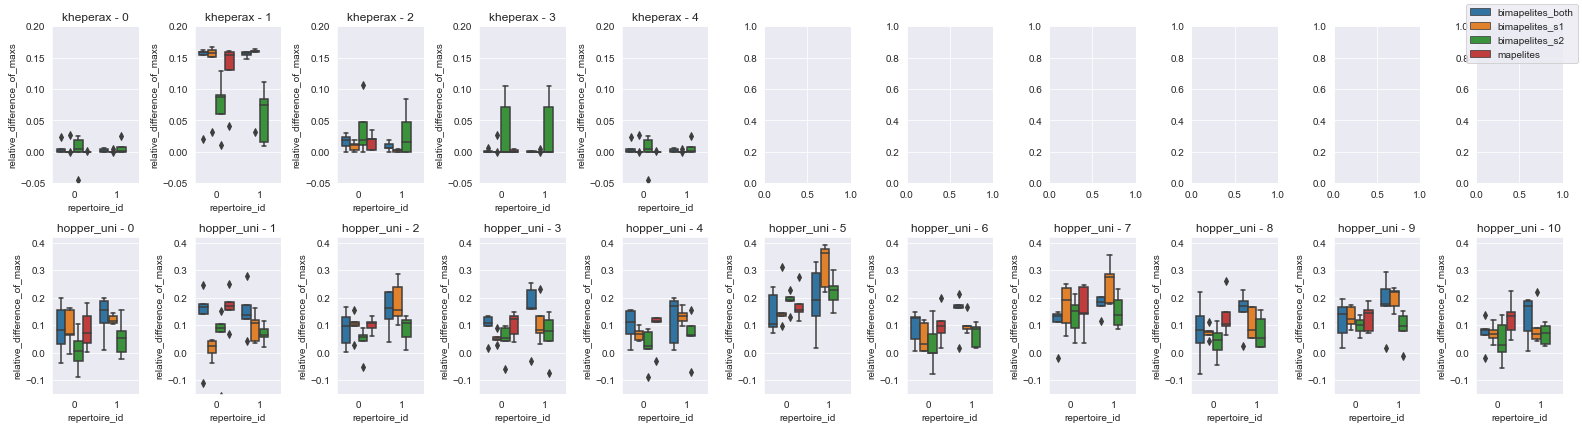

In [28]:
cols = max(validation_df["sensor_id"].unique()) + 1
limits = {
    "kheperax": [-0.05, 0.2],
    "hopper_uni": [-0.15, 0.42],
}
fig, axs = plt.subplots(2, cols, figsize=(2 * cols, 6))
for i, env in enumerate(["kheperax", "hopper_uni"]):
    tmp_df = validation_df[validation_df["environment"] == env]
    for sensor_id in tmp_df["sensor_id"].unique():
        tmp_tmp_df = tmp_df[tmp_df["sensor_id"] == sensor_id]
        g = sns.boxplot(
            data=tmp_tmp_df,
            ax=axs[i][sensor_id],
            hue="sampling",
            y="relative_difference_of_maxs",
            x="repertoire_id",
        )
        axs[i][sensor_id].set_title(f"{env} - {sensor_id}")
        axs[i][sensor_id].get_legend().set_visible(False)
        axs[i][sensor_id].set_ylim(limits[env])
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
plt.show()